In [72]:
%load_ext autoreload
%autoreload 2

import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr,spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

from bike_data_module import BikeData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%%html
<style>
.highlight {
    background-color: #F0F0F0;
}
</style>




# Section : 1  Basic data understanding

## Section 1.1 : Loading data 

In [3]:
current_path = os.getcwd()
Data_dir = os.path.join(current_path,'bike+sharing+dataset/hour.csv')

# start as a rough draft then make it better by having a .py file for all the functions and call it in this seperate notebook!!

# create a dataframe 
df_bike = pd.read_csv(Data_dir)
df_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Section 1.2 : Number of data points and features in the data

In [4]:
print(f"Number of data points in the data :{df_bike.shape[0]}\nNumber of features in the data : {df_bike.shape[1]}")

Number of data points in the data :17379
Number of features in the data : 17


## Data Statistics



In [5]:
df_bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Reasoning:

- **Since the variable features like <span class="highlight"> temp,atemp,hum and windspeed have been normalized already we have a range from around "0" to "1"</span>**

- **So <span class="highlight">no normalization </span>would be carried out for these features.**

In [6]:
# Information about the datatype for each feature
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# Checking for NA and Null values
print(df_bike.isna().sum())
print(df_bike.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
print(f" Number of duplicated entries within the data :{len(df_bike[df_bike.duplicated()])}")

 Number of duplicated entries within the data :0


## Notes:

- Data contains 17379 data points.
- Data contains 17 features.
- **<span class="highlight"> No Null values are presented and therefore does'nt needs to be addressed</span>**
- **<span class="highlight"> No duplicate entries are present</span>**

In [9]:
# Unique values in each feature
df_bike.apply(lambda x : len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

# Basic data understanding about each feature 

## Notes : 
**<span class="highlight"> Observations for the data.</span>**

- **instant (record index)** : <span class="highlight"> This columns is an index for the records and hence can be droped.</span>

- **dteday (date)**: This feature provides information about the year,month and day of the week. <span class="highlight">This feature will be dropped because it is a redundant information since we already have year, month and day of week as seperate features</span>

- **yr (year)** : (0: 2011, 1:2012) information about the year.
- **mnth (month)** : month ( 1 to 12) inforamtion about the month.<span class="highlight"> This feature will be mapped to the names of the month and then one hot encoded.</span>
- **hr (hour)** : hour (0 to 23) information about the hour of day.
- **holiday** : weather day is holiday or not(binary variable).
- **weekday** : day of the week.<span class="highlight"> This feature will be mapped to the name of the day and one hot encoded.</span>
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
- **season** : season (1:springer, 2:summer, 3:fall, 4:winter).<span class="highlight"> This feature will be mapped to the name of the season and one hot encoded.</span>

- **weathersit** : ordinal encoding for weather, which will be mapped to a smaller label and one hot encoded.
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy to **"Clear_cloudy"**
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist to **"Misty_cloudy"**
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds to **"Light_rain_snow"**
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog to to **"Heavy_rain_snow"**

- **temp** : Normalized temperature in celsius
- **atemp**: Normalized feel like temperature in celsius

- **hum**: Normalized humidity. 
- **windspeed**: Normalized wind speed. 
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered. <span class="highlight"> Since the target is a summation of the casual and registered bikers therefore casual and registered would be dropped.</span>

In [10]:
# Based on the above observations dropping some of the columns.

df_bike.drop(["instant","dteday"],axis=1,inplace=True)

## Maping some of the features to appropraite categories

In [11]:
# Map the seasons
seasons={1:"spring",
         2:"summer",
         3:"fall",
         4:"winter"}

weather={1:"Clear_cloudy",
         2:"Misty_cloudy",
         3:"Light_rain_snow",
         4:"Heavy_rain_snow"}

# Maping season feature
df_bike["season"]=df_bike["season"].map(seasons)

# Maping mnth feature
df_bike["mnth"]=df_bike["mnth"].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
                     7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

# Maping the weekday feature
df_bike["weekday"]=df_bike["weekday"].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

# Maping the weathersit feature
df_bike["weathersit"]=df_bike["weathersit"].map(weather)


df_bike.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,0,Sat,0,Clear_cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,spring,0,Jan,1,0,Sat,0,Clear_cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,spring,0,Jan,2,0,Sat,0,Clear_cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,spring,0,Jan,3,0,Sat,0,Clear_cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,spring,0,Jan,4,0,Sat,0,Clear_cloudy,0.24,0.2879,0.75,0.0,0,1,1


# Section 2:

## Exploratory Data Analysis:

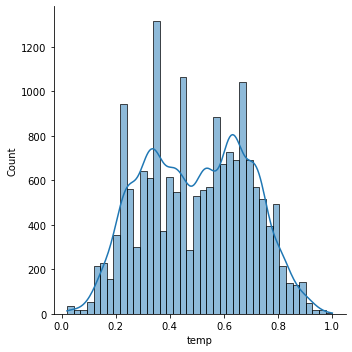

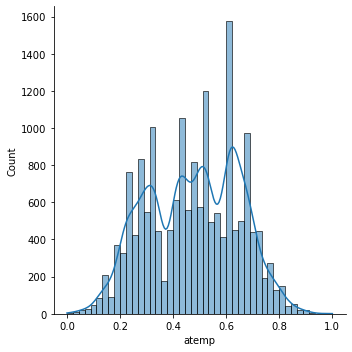

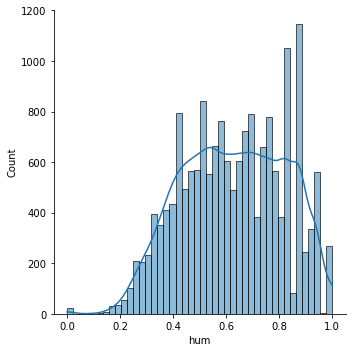

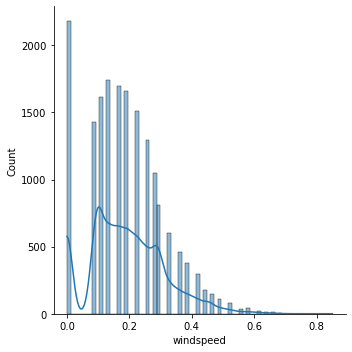

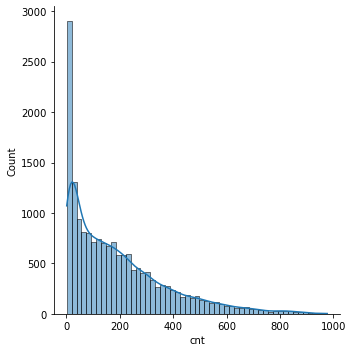

In [12]:
features=["temp","atemp","hum","windspeed","cnt"]

for i in features:
    sns.displot(df_bike[i],kind="hist",kde=True)

## Reasoning:

- The distribution for the Target variable shows a Right skewed distribution.
- The log transformation can be used to deal with the skewedness in the target variable.
- For some models this might not be an issue like decision trees, random forest and gradient boosting.

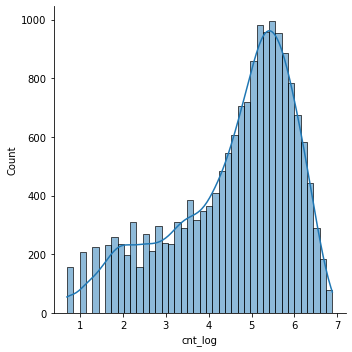

In [13]:
# visualising the target variable distribution after the log transform.
df_bike['cnt_log'] = np.log1p(df_bike['cnt'])
sns.displot(df_bike['cnt_log'],kind="hist",kde=True)

## Section 2.1

## Growth over the years for the bike rentals per month.



In [14]:
# monthly demand dataframe for the two years
monthly_demand=df_bike.pivot_table(index="mnth",columns="yr",values="cnt",aggfunc="mean")

monthly_demand.columns=["2011","2012"]

# Percent growth 
monthly_demand["percent_growth"]=round(((monthly_demand["2012"]-monthly_demand["2011"])/monthly_demand["2011"])*100,2)

monthly_demand=monthly_demand.sort_values(by="percent_growth",ascending=False)

monthly_demand

,2011,2012,percent_growth
mnth,,,
Mar,87.732877,221.904441,152.93
Jan,55.507267,130.558704,135.21
Feb,74.291217,149.041908,100.62
Apr,131.947149,242.651811,83.90
Sep,177.709902,303.573611,70.83
Oct,166.232840,280.848870,68.95
Aug,186.991792,288.310484,54.18
Nov,142.095967,212.623955,49.63
May,182.555108,263.259409,44.21


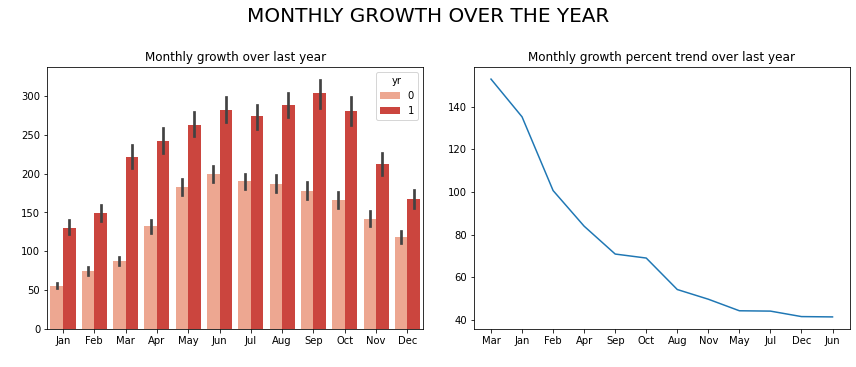

In [15]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,5))

plt.suptitle("Monthly growth over the year".upper(),fontsize=20,y=1.01)

sns.barplot(x="mnth",y="cnt",data=df_bike,hue="yr",ax=ax[0],palette="Reds")
ax[0].set_ylabel(" ")
ax[0].set_xlabel(" ")
ax[0].set_title("Monthly growth over last year")

sns.lineplot(x=monthly_demand.index,y=monthly_demand["percent_growth"],ax=ax[1],palette="Reds")
ax[1].set_ylabel(" ")
ax[1].set_xlabel(" ")
ax[1].set_title("Monthly growth percent trend over last year")

plt.tight_layout()
plt.show()

## Reasoning:

- Year 2012 see an overall rise in bike rentals per month compared to year 2011.
- March, January and February show an over 100% growth.

# Further analysis

## Hourly analysis of bike rentals on working and non working days

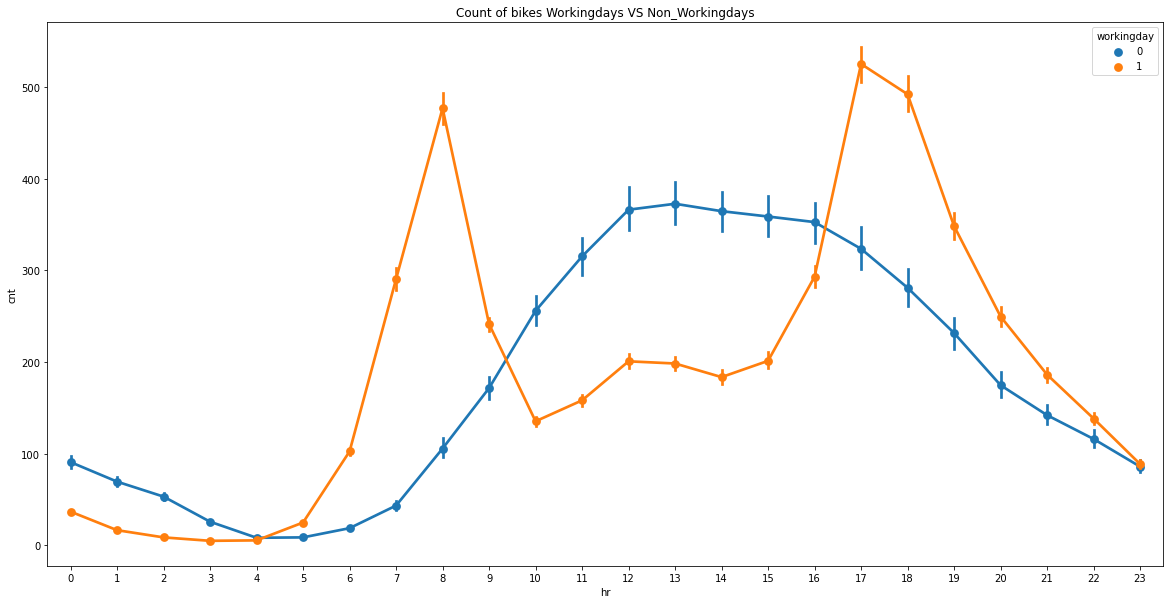

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
bike_data_analyzer= BikeData(df_bike)
bike_data_analyzer.pointplot_bikedata(
                   x="hr",
                   y="cnt",
                   hue="workingday",
                   ax=ax,
                   title="Count of bikes Workingdays VS Non_Workingdays"
    
                   )
plt.show()

## Reasoning:

- Working days corresponds to the label "0".
- Weekend and Holidays correspond to the label "1".

- Two spikes can be observed in the Workingdays graph at specific hours suggesting a surge of bike rentals.
- Tentatively from 5:00 to 10:00 we get our first spike suggesting the high use of bike rentals(Example:going to school,work or office).
- And from 16:00 to 20:00 we get our next spike (Example:going back from school, work or office).

- On the weekdays and holidays we get a nice curve for the bike rentals tentatively between 9:00 to 20:00.

## Hourly analysis over the week for bike rentals

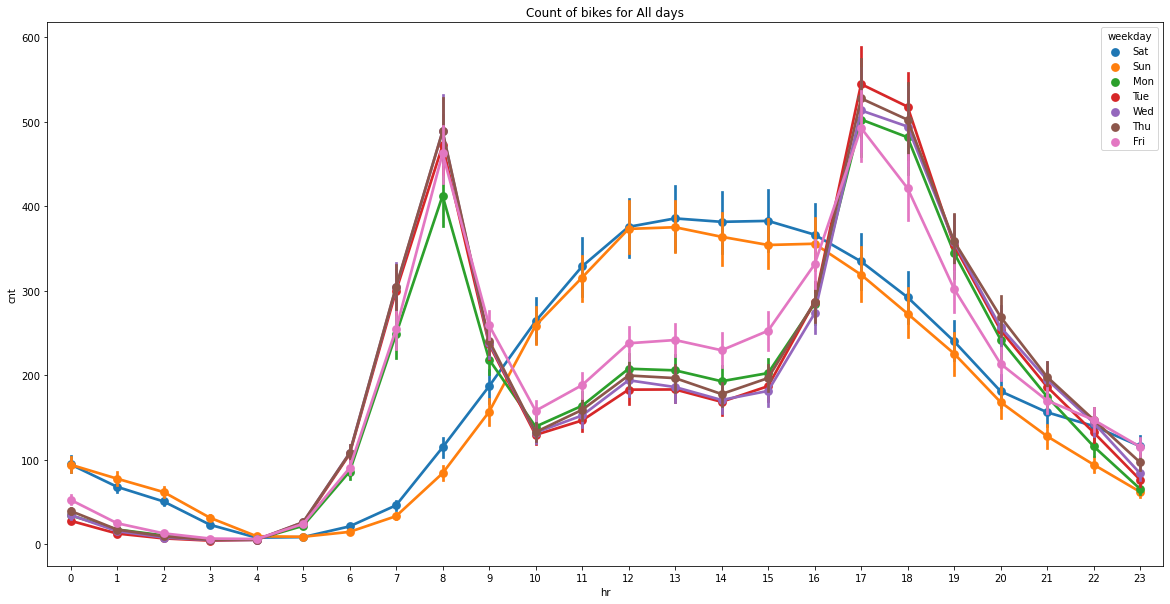

In [17]:
# Visualize the same grapgh for all the days
fig, ax = plt.subplots(figsize=(20, 10))
bike_data_analyzer.pointplot_bikedata(
                   x="hr",
                   y="cnt",
                   hue="weekday",
                   ax=ax,
                   title="Count of bikes for All days"
    
                   )
plt.show()

## Reasoning:

- The two spikes that were seen in the previous plot are visible here for all the weekdays.
- For the weekend that is the orange and blue line we see an increase from 9:00 to 20:00 .


## Hourly analysis over the whole week for Casual Vs Registered users

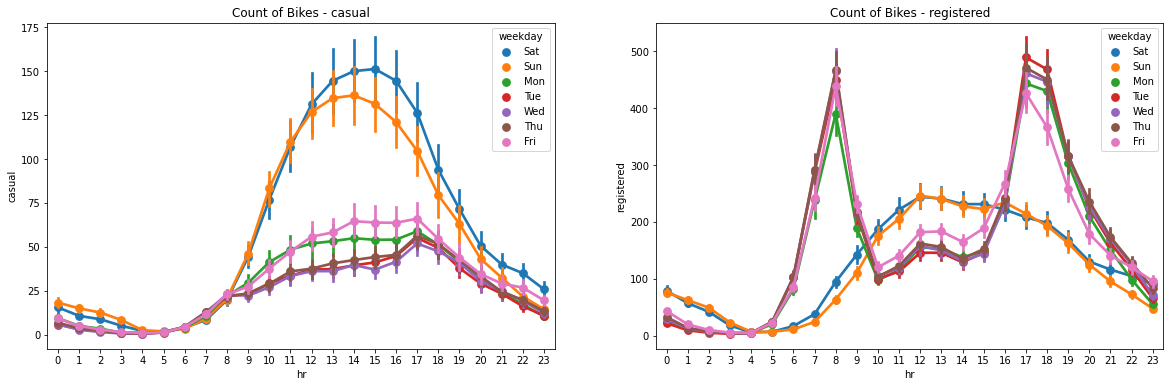

In [18]:
# Visusalizing registered vs unregistered users for all weekdays

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))



# Features to draw the plots for.
categories = ['casual', 'registered']


for i, ax in enumerate(axes):
    category = categories[i]
    bike_data_analyzer.pointplot_bikedata(x='hr', y=category, hue="weekday", ax=ax, title=f'Count of Bikes - {category}')
plt.show()

## Reasoning:

- From the two plots its evident that casual users use the bike rentals on the weekends and holidays more.
- While the registered users use it on the weekdays more often.

## Hourly analysis over the weather condition for all users.

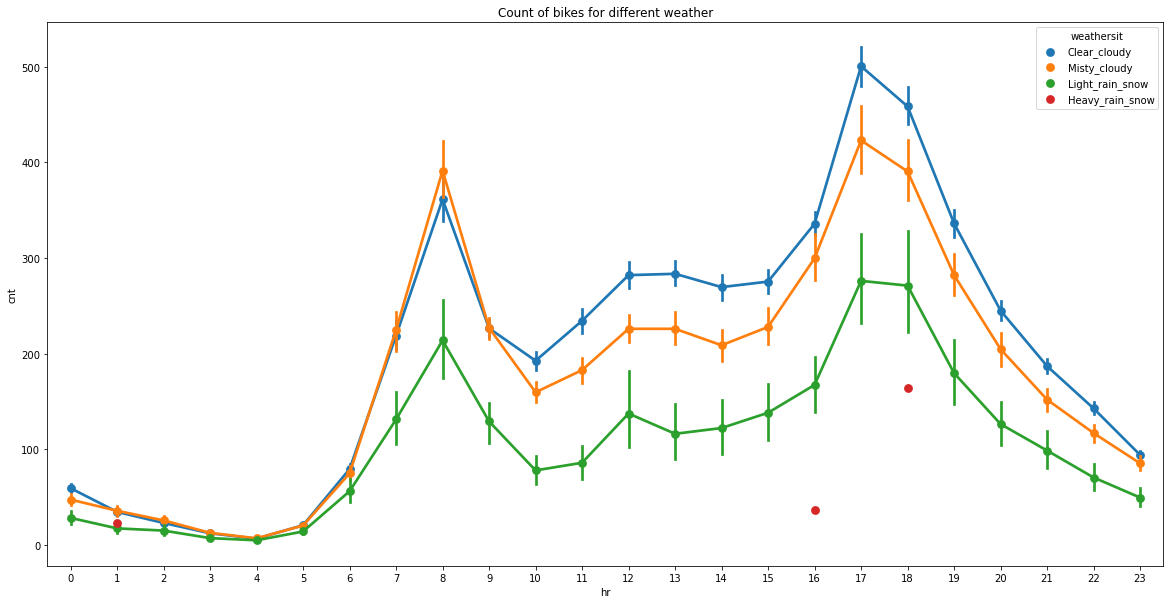

In [19]:
# Visualizing bike rentals for different weather.
fig, ax = plt.subplots(figsize=(20, 10))
bike_data_analyzer.pointplot_bikedata(
                   x="hr",
                   y="cnt",
                   hue="weathersit",
                   ax=ax,
                   title="Count of bikes for different weather"
    
                   )
plt.show()

## Reasoning:

- From the plot its evident that in Heavy_rain_snow rarely the bike rentals are used.
- While in clear_cloudy and misty_cloudy weather there are more users compared to Light_rain_snow.

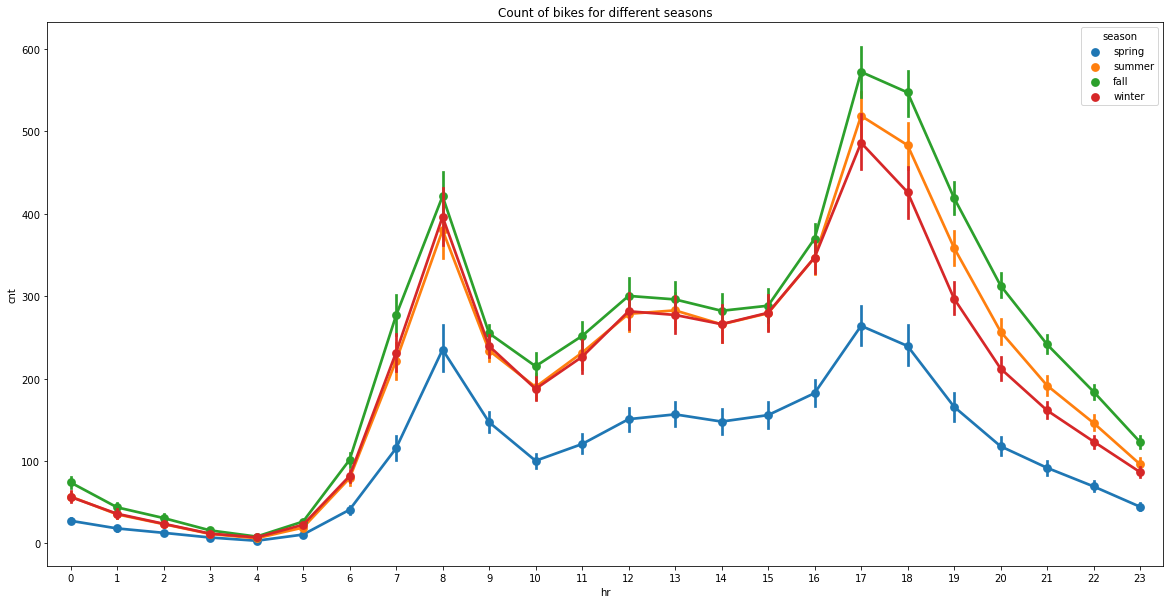

In [20]:
# Visualizing bike rentals for different seasons.
fig, ax = plt.subplots(figsize=(20, 10))
bike_data_analyzer.pointplot_bikedata(
                   x="hr",
                   y="cnt",
                   hue="season",
                   ax=ax,
                   title="Count of bikes for different seasons"
    
                   )
plt.show()

## Reasoning:

- The bike rentals are less for the Spring season while the other seasons somewhat have nearly similar users.

## Bike rentals for different months

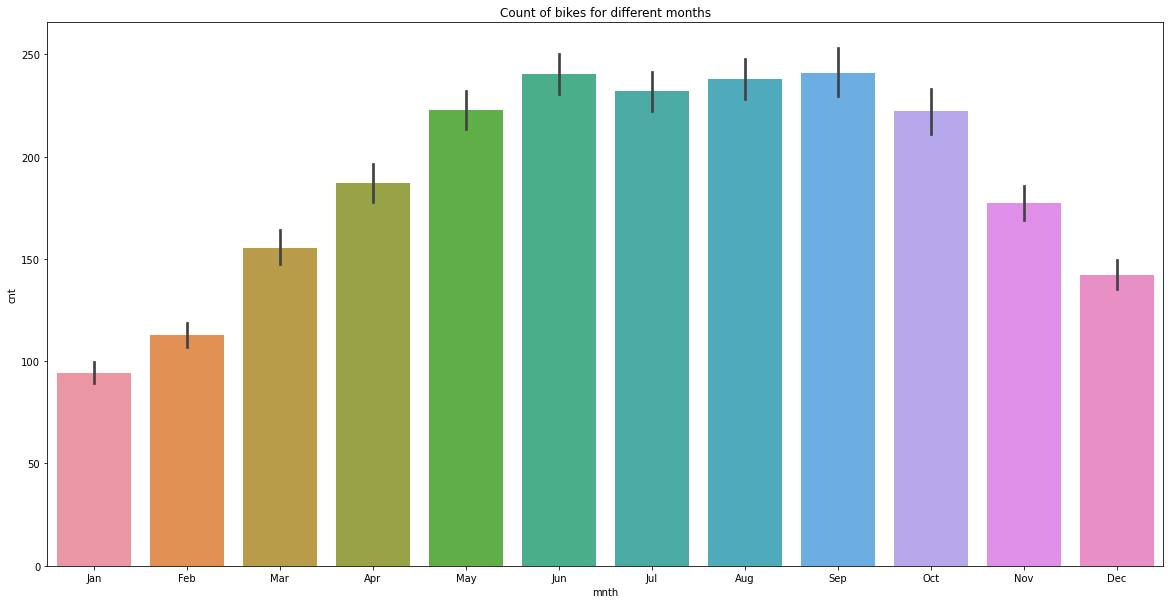

In [22]:
# Visualizing bike rentals for different months.
fig, ax = plt.subplots(figsize=(20, 10))
bike_data_analyzer.barplot_bikedata(
                   x="mnth",
                   y="cnt",
                   ax=ax,
                   title="Count of bikes for different months"
    
                   )
plt.show()

## Bike rentals for days of the week

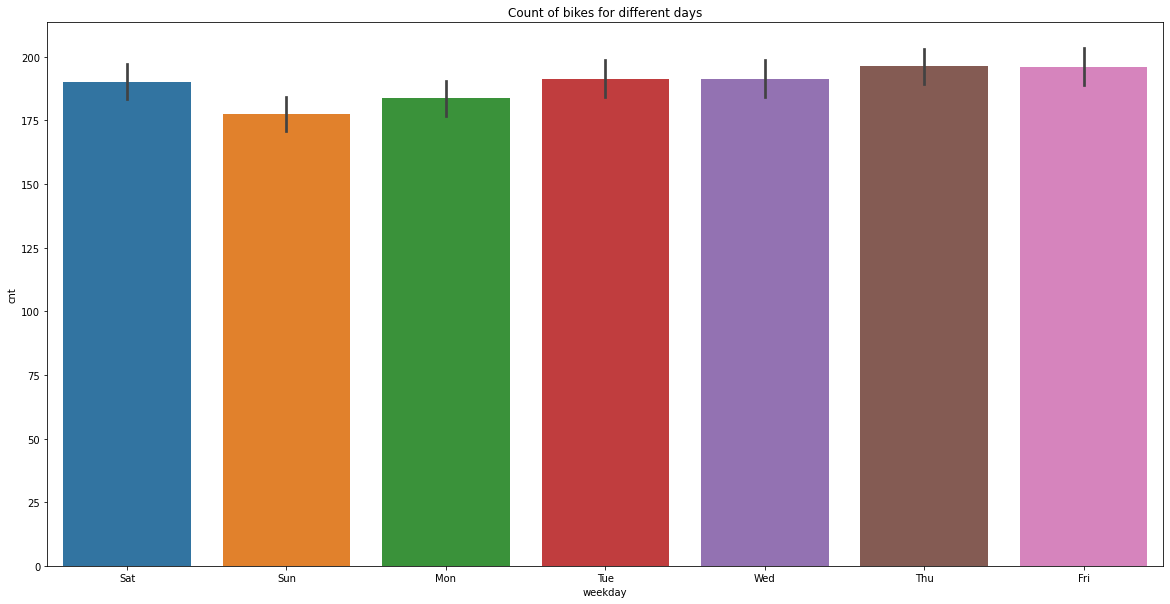

In [23]:
# Visualizing bike rentals for different days of the week.
fig, ax = plt.subplots(figsize=(20, 10))
bike_data_analyzer.barplot_bikedata(
                   x="weekday",
                   y="cnt",
                   ax=ax,
                   title="Count of bikes for different days"
    
                   )
plt.show()

## Percent of registered and casual bike users

Text(0.5, 1.0, 'Percent of registered users Vs casual')

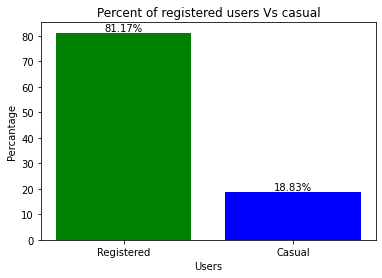

In [24]:
# Percent of Registered users Vs Casual users
users=["Registered","Casual"]
numbers=[df_bike["registered"].sum()/df_bike["cnt"].sum()*100,
       df_bike["casual"].sum()/df_bike["cnt"].sum()*100]

colors = ["green", 
          "blue"]

# Plot the values
bars=plt.bar(users,numbers,color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}%', 
             va='bottom', ha='center')

plt.xlabel("Users")
plt.ylabel("Percantage")
plt.title("Percent of registered users Vs casual")

(0.0, 100.0)

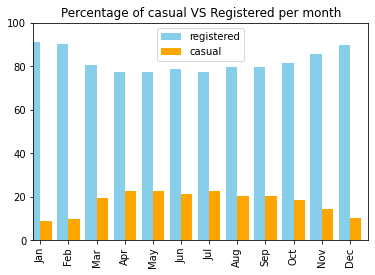

In [65]:
# Percentage of casual and registered bikers monthwise
monthly_registered=df_bike.groupby(["mnth",])["registered"].sum()/df_bike.groupby("mnth")["cnt"].sum()*100
monthly_casual=df_bike.groupby(["mnth",])["casual"].sum()/df_bike.groupby("mnth")["cnt"].sum()*100
 
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the index to a categorical type with the months in order
monthly_casual.index = pd.Categorical(monthly_casual.index, categories=month_order, ordered=True)

# Sort the series 
sorted_series_casual = monthly_casual.sort_index()

monthly_registered.index = pd.Categorical(monthly_registered.index, categories=month_order, ordered=True)


sorted_series_registered = monthly_registered.sort_index()


fig, ax = plt.subplots()
sorted_series_registered.plot(kind='bar', color='skyblue', ax=ax, width=0.4, position=1)
sorted_series_casual.plot(kind='bar', color='orange', ax=ax, width=0.4, position=0)

plt.title("Percentage of casual VS Registered per month")
plt.legend(["registered","casual"])
# Setting y-axis limit to 100
plt.ylim(0, 100)


## Percent of Season wise bike usage

In [64]:
df_bike.groupby(["season"]).sum()["cnt"]/df_bike["cnt"].sum()*100

season
fall      32.226919
spring    14.315030
summer    27.897921
winter    25.560129
Name: cnt, dtype: float64

## Mean bike use for each month

In [32]:
df_bike.groupby("mnth")["cnt"].mean()

mnth
Apr    187.260960
Aug    238.097627
Dec    142.303439
Feb    112.865026
Jan     94.424773
Jul    231.819892
Jun    240.515278
Mar    155.410726
May    222.907258
Nov    177.335421
Oct    222.158511
Sep    240.773138
Name: cnt, dtype: float64

## Correlation with the the target variable

<AxesSubplot:>

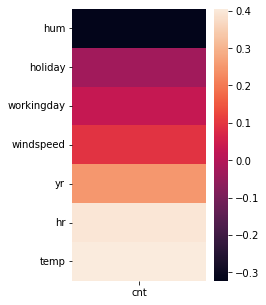

In [34]:
plt.figure(figsize=(3,5))
sns.heatmap(df_bike.corr()[["cnt"]].sort_values(by="cnt").drop(["cnt_log",
                                                                "casual",
                                                                "registered",
                                                                "cnt",
                                                                 "atemp"]))

## Heatmap of bike usage by casual riders

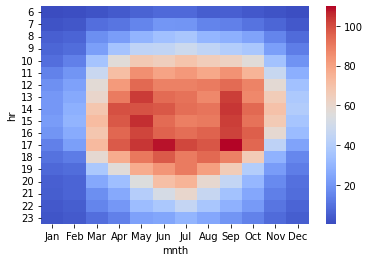

In [75]:

df_bike['mnth'] = pd.Categorical(df_bike['mnth'], categories=month_order, ordered=True)

# Create the pivot table
pivot_table = pd.pivot_table(data=df_bike[df_bike["hr"] > 5],
                             index="hr",
                             columns="mnth",
                             values="casual",
                             aggfunc="mean")

# Plot the heatmap
ax = sns.heatmap(pivot_table, cmap="coolwarm")


## Heatmap of bike usage by casual riders

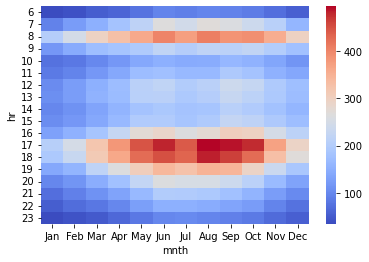

In [36]:

# Create the pivot table
pivot_table = pd.pivot_table(data=df_bike[df_bike["hr"] > 5],
                             index="hr",
                             columns="mnth",
                             values="registered",
                             aggfunc="mean")

# Plot the heatmap
ax = sns.heatmap(pivot_table, cmap="coolwarm")



## Section : 3

### Machine learning 


In [52]:
df_bike_ds=df_bike.drop(["casual","registered","atemp"],axis=1).copy()

In [53]:
df_bike_ds

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,cnt_log
0,spring,0,Jan,0,0,Sat,0,Clear_cloudy,0.24,0.81,0.0000,16,2.833213
1,spring,0,Jan,1,0,Sat,0,Clear_cloudy,0.22,0.80,0.0000,40,3.713572
2,spring,0,Jan,2,0,Sat,0,Clear_cloudy,0.22,0.80,0.0000,32,3.496508
3,spring,0,Jan,3,0,Sat,0,Clear_cloudy,0.24,0.75,0.0000,13,2.639057
4,spring,0,Jan,4,0,Sat,0,Clear_cloudy,0.24,0.75,0.0000,1,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1,Dec,19,0,Mon,1,Misty_cloudy,0.26,0.60,0.1642,119,4.787492
17375,spring,1,Dec,20,0,Mon,1,Misty_cloudy,0.26,0.60,0.1642,89,4.499810
17376,spring,1,Dec,21,0,Mon,1,Clear_cloudy,0.26,0.60,0.1642,90,4.510860
17377,spring,1,Dec,22,0,Mon,1,Clear_cloudy,0.26,0.56,0.1343,61,4.127134


In [54]:
# Creating dummy variables

dummy_features=[i for i in df_bike_ds.select_dtypes(include=["object","category"]).columns ]


for i in dummy_features:
    dummy=pd.get_dummies(data=df_bike_ds[i])
    df_bike_ds=pd.concat([df_bike_ds,dummy],axis=1).drop(labels=i,axis=1)

df_bike_ds

,yr,hr,holiday,workingday,temp,hum,windspeed,cnt,cnt_log,fall,...,Mon,Sat,Sun,Thu,Tue,Wed,Clear_cloudy,Heavy_rain_snow,Light_rain_snow,Misty_cloudy
0,0,0,0,0,0.24,0.81,0.0000,16,2.833213,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0.22,0.80,0.0000,40,3.713572,0,...,0,1,0,0,0,0,1,0,0,0
2,0,2,0,0,0.22,0.80,0.0000,32,3.496508,0,...,0,1,0,0,0,0,1,0,0,0
3,0,3,0,0,0.24,0.75,0.0000,13,2.639057,0,...,0,1,0,0,0,0,1,0,0,0
4,0,4,0,0,0.24,0.75,0.0000,1,0.693147,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,19,0,1,0.26,0.60,0.1642,119,4.787492,0,...,1,0,0,0,0,0,0,0,0,1
17375,1,20,0,1,0.26,0.60,0.1642,89,4.499810,0,...,1,0,0,0,0,0,0,0,0,1
17376,1,21,0,1,0.26,0.60,0.1642,90,4.510860,0,...,1,0,0,0,0,0,1,0,0,0
17377,1,22,0,1,0.26,0.56,0.1343,61,4.127134,0,...,1,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

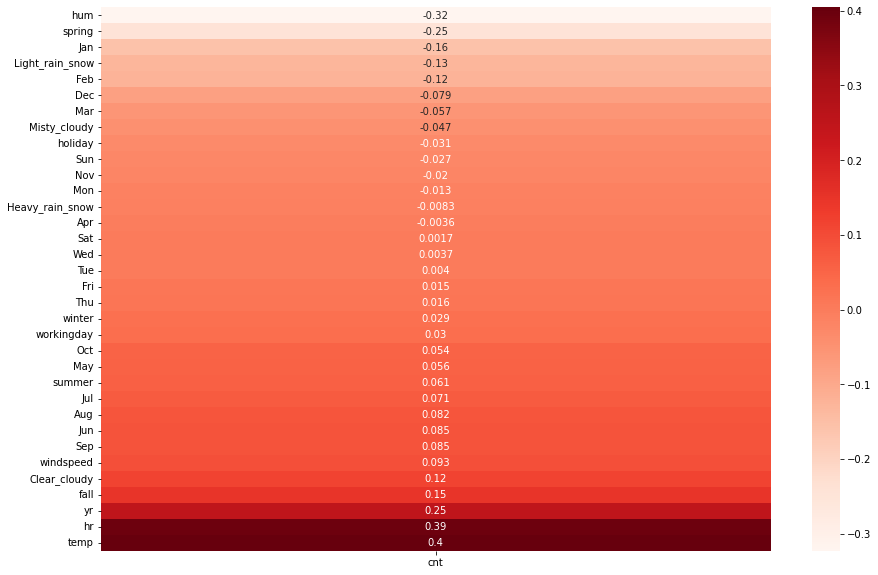

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(df_bike_ds.corr()[["cnt"]].sort_values(by="cnt").drop(["cnt_log",
                                                                "cnt"]),annot=True,cmap="Reds")

In [74]:
BikeData.analyze_correlation(df_bike_ds)

,Column_1,Column_2,Relationship_strength,Relation_type,Correlation
0,hr,cnt,Medium,Positive,0.39
1,hr,cnt_log,Medium,Positive,0.56
2,workingday,Sat,Medium,Negative,-0.60
3,workingday,Sun,Medium,Negative,-0.60
4,temp,cnt,Medium,Positive,0.40
5,temp,cnt_log,Medium,Positive,0.39
6,temp,fall,Medium,Positive,0.64
7,temp,spring,Medium,Negative,-0.58
8,temp,Jul,Medium,Positive,0.41
9,temp,Aug,Medium,Positive,0.33


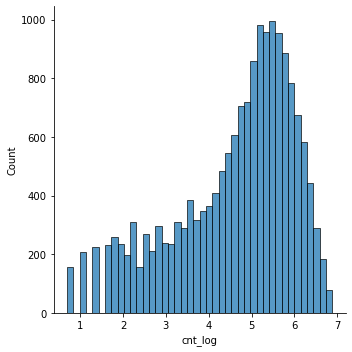

In [56]:
sns.displot(df_bike_ds["cnt_log"])

Linear Regression - Mean Absolute Deviation: 100.48293478812681


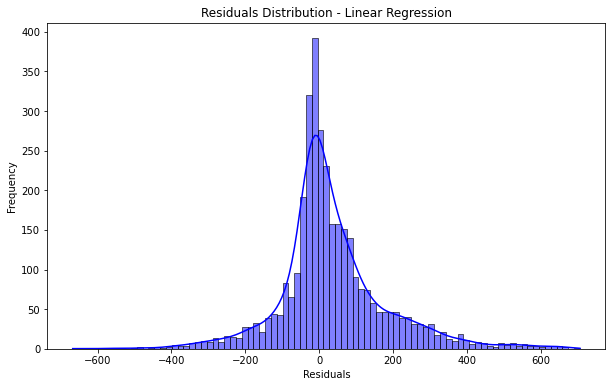

Lasso - Mean Absolute Deviation: 127.84045665929045


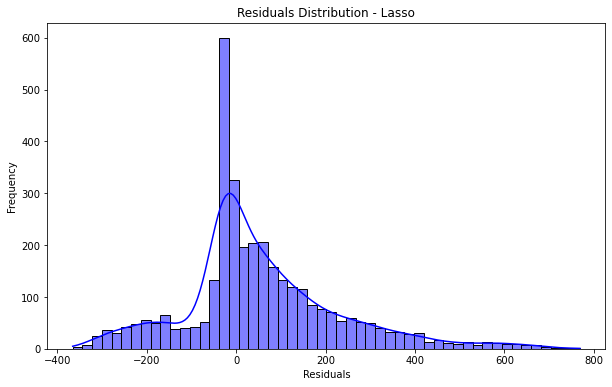

Ridge - Mean Absolute Deviation: 100.4966853577995


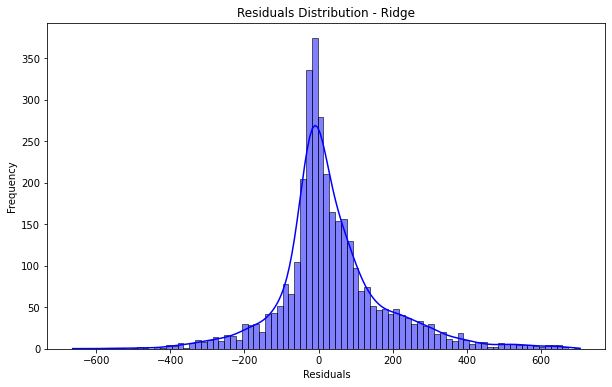

Random Forest - Mean Absolute Deviation: 24.152229027370392


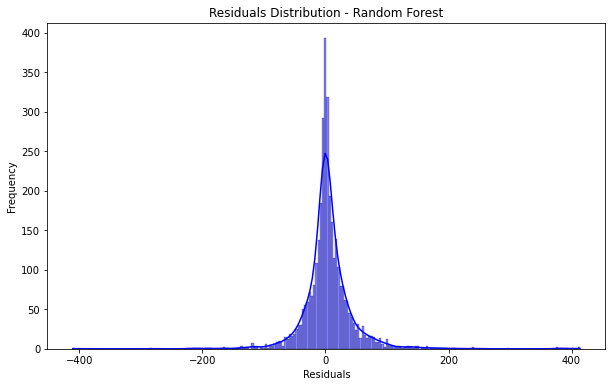

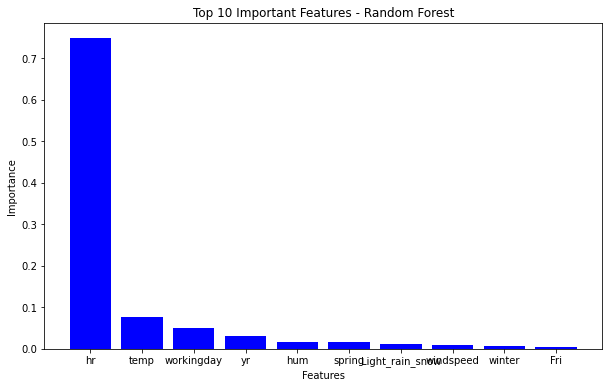

Gradient Boost - Mean Absolute Deviation: 50.92334540840427


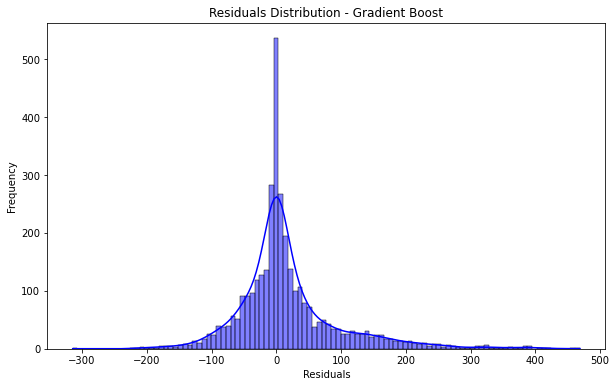

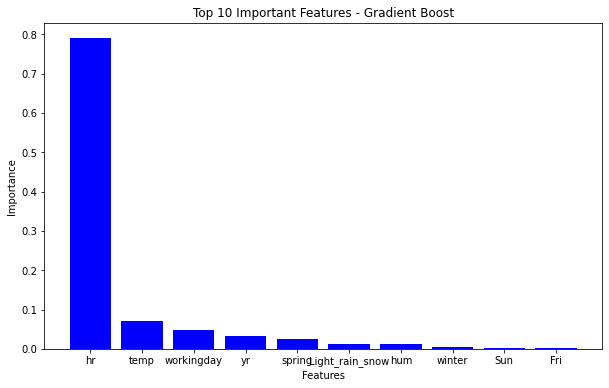

SVR - Mean Absolute Deviation: 69.13281775525462


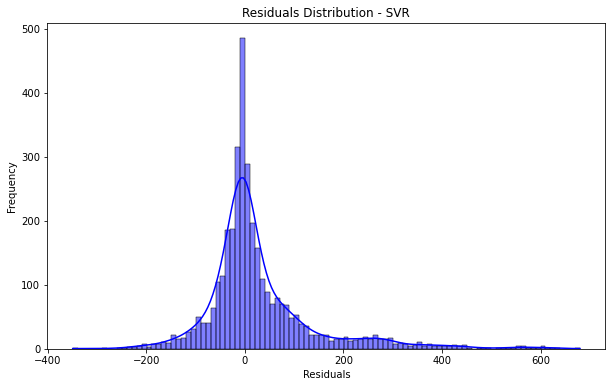

XGB - Mean Absolute Deviation: 24.651408930419503


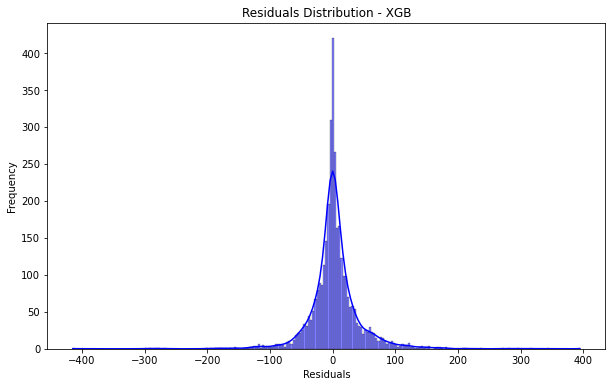

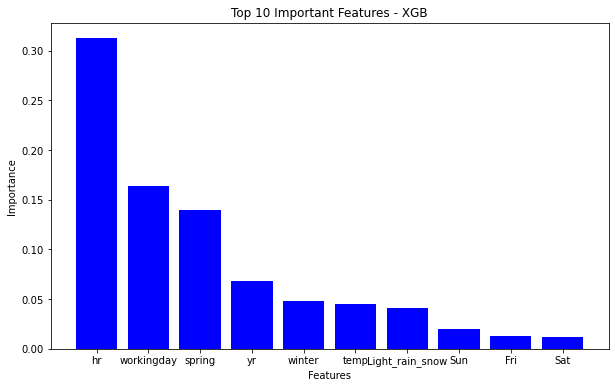

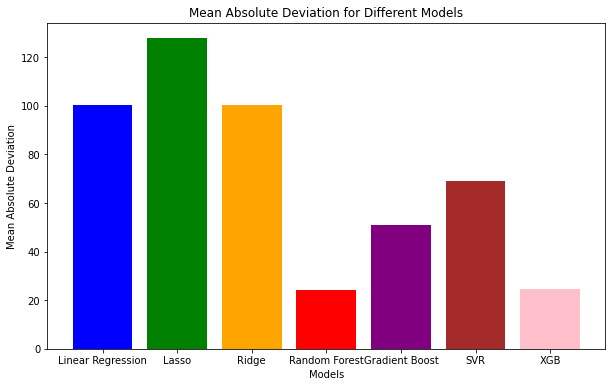

In [76]:
X = df_bike_ds.drop(["cnt","cnt_log"], axis=1)
y = df_bike_ds["cnt_log"]

# Evaluate the models
BikeData.evaluate_models(X,y)

